In [1]:
# import -- > libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option('display.max_columns', None)
import re
import missingno

# Sklearn --> Preprocessing 

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler , OrdinalEncoder , OneHotEncoder
from sklearn.pipeline import Pipeline , FeatureUnion
from sklearn_features.transformers import DataFrameSelector

# Sklearn --> Models
from sklearn.linear_model import LinearRegression , SGDRegressor , Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor





# Slearn --> metrics
from sklearn.metrics import r2_score

# Slearn --> Tuning
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('train.csv')
df.head()

brand                      model    year  mileage  \
0       Mazda               CX-9 Touring  2022.0   6580.0   
1        Alfa  Romeo Stelvio 4DR SUV AWD  2018.0  62717.0   
2   Chevrolet  Silverado 1500 Limited LT  2022.0  15463.0   
3        Land  Rover Range Rover P400 SE  2022.0   1281.0   
4  Mitsubishi     Outlander Sport 2.0 SE  2021.0  36727.0   

                                      engine  engine_size       transmission  \
0                 2.5L I4 16V GDI DOHC Turbo          2.5  6-Speed Automatic   
1  Twin Turbo Premium Unleaded V-6 2.9 L/176          2.9          Automatic   
2                        5.3L V8 16V GDI OHV          5.3          Automatic   
3                 3.0L I6 24V GDI DOHC Turbo          3.0          Automatic   
4                      2.0L I4 16V MPFI DOHC          2.0      Automatic CVT   

   automatic_transmission fuel_type         drivetrain  min_mpg  max_mpg  \
0                     1.0  Gasoline   Four-wheel Drive      NaN      NaN   
1                     1.0  Gasoline   Four-wheel Drive      NaN      NaN   
2                     1.0  Gasoline   Four-wheel Drive      NaN      NaN   
3                     1.0  Gasoline   Four-wheel Drive      NaN      NaN   
4                     1.0  Gasoline  Front-wheel Drive      NaN      NaN   

   damaged  first_owner  personal_using  turbo  alloy_wheels  \
0      0.0          0.0             0.0    1.0           1.0   
1      0.0          0.0             1.0    1.0           0.0   
2      0.0          1.0             1.0    0.0           0.0   
3      0.0          1.0             1.0    1.0           0.0   
4      0.0          1.0             0.0    0.0           1.0   

   adaptive_cruise_control  navigation_system  power_liftgate  backup_camera  \
0                      0.0                0.0             1.0            1.0   
1                      1.0                1.0             1.0            1.0   
2                      0.0                0.0             0.0            0.0   
3                      1.0                1.0             1.0            1.0   
4                      0.0                0.0             0.0            1.0   

   keyless_start  remote_start  sunroof/moonroof  automatic_emergency_braking  \
0            0.0           0.0               1.0                          0.0   
1            1.0           1.0               0.0                          0.0   
2            0.0           1.0               0.0                          0.0   
3            0.0           1.0               1.0                          0.0   
4            1.0           0.0               0.0                          0.0   

   stability_control  leather_seats  memory_seat  third_row_seating  \
0                1.0            1.0          0.0                1.0   
1                1.0            0.0          1.0                0.0   
2                0.0            0.0          0.0                0.0   
3                1.0            1.0          1.0                0.0   
4                1.0            0.0          0.0                0.0   

   apple_car_play/android_auto  bluetooth  usb_port  heated_seats  \
0                          1.0        0.0       0.0           1.0   
1                          1.0        1.0       0.0           0.0   
2                          0.0        0.0       0.0           1.0   
3                          0.0        0.0       0.0           1.0   
4                          1.0        1.0       1.0           1.0   

  interior_color               exterior_color   price  
0          Black        Snowflake White Pearl   36789  
1          Black  Rosso Competizione Tri-Coat   39993  
2      Jet Black          Silver Ice Metallic   46986  
3          Ebony                   Fuji White  141999  
4          Black                        White   21595

In [3]:
#check Shape
df.shape

(19109, 36)

In [4]:
#check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19109 entries, 0 to 19108
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brand                        19107 non-null  object 
 1   model                        19107 non-null  object 
 2   year                         19107 non-null  float64
 3   mileage                      19107 non-null  float64
 4   engine                       19062 non-null  object 
 5   engine_size                  17860 non-null  float64
 6   transmission                 19004 non-null  object 
 7   automatic_transmission       19107 non-null  float64
 8   fuel_type                    19107 non-null  object 
 9   drivetrain                   19107 non-null  object 
 10  min_mpg                      16103 non-null  float64
 11  max_mpg                      16103 non-null  float64
 12  damaged                      18940 non-null  float64
 13  first_owner     

# Data cleaning

In [5]:
# Statistical check for object features
df.select_dtypes(include='object').describe()

brand            model                      engine       transmission  \
count   19107            19107                       19062              19004   
unique     25             3498                        1163                189   
top      Audi  Romeo Giulia Ti  2.0L I4 16V GDI DOHC Turbo  8-Speed Automatic   
freq      855              169                        2324               5403   

       fuel_type        drivetrain interior_color exterior_color  price  
count      19107             19107          17952          18900  19107  
unique        10                 5            957           1941   9088  
top     Gasoline  Four-wheel Drive          Black          Black  29995  
freq       17207             10824           7432           1405     61

In [6]:
# Statistical check for numeric  features
df.select_dtypes(include='number').describe()

year        mileage   engine_size  automatic_transmission  \
count  19107.000000   19107.000000  17860.000000            19107.000000   
mean    2017.773120   47947.087403      2.973191                0.917098   
std        4.996385   38285.061200      5.478008                0.275741   
min     1962.000000       0.000000      0.000000                0.000000   
25%     2016.000000   19307.000000      2.000000                1.000000   
50%     2019.000000   39141.000000      2.500000                1.000000   
75%     2021.000000   68431.500000      3.500000                1.000000   
max     2024.000000  383614.000000    390.000000                1.000000   

            min_mpg       max_mpg       damaged   first_owner  personal_using  \
count  16103.000000  16103.000000  18940.000000  18803.000000    18920.000000   
mean      20.827796     27.817270      0.217371      0.517417        0.718288   
std        6.017846      6.513062      0.412468      0.499710        0.449846   
min        0.000000      0.000000      0.000000      0.000000        0.000000   
25%       17.000000     24.000000      0.000000      0.000000        0.000000   
50%       20.000000     28.000000      0.000000      1.000000        1.000000   
75%       24.000000     31.000000      0.000000      1.000000        1.000000   
max       89.000000    100.000000      1.000000      1.000000        1.000000   

              turbo  alloy_wheels  adaptive_cruise_control  navigation_system  \
count  19107.000000  19107.000000             19107.000000       19107.000000   
mean       0.404250      0.901345                 0.265819           0.508714   
std        0.490759      0.298206                 0.441780           0.499937   
min        0.000000      0.000000                 0.000000           0.000000   
25%        0.000000      1.000000                 0.000000           0.000000   
50%        0.000000      1.000000                 0.000000           1.000000   
75%        1.000000      1.000000                 1.000000           1.000000   
max        1.000000      1.000000                 1.000000           1.000000   

       power_liftgate  backup_camera  keyless_start  remote_start  \
count    19107.000000   19107.000000   19107.000000  19107.000000   
mean         0.334903       0.673941       0.391898      0.399853   
std          0.471969       0.468781       0.488187      0.489881   
min          0.000000       0.000000       0.000000      0.000000   
25%          0.000000       0.000000       0.000000      0.000000   
50%          0.000000       1.000000       0.000000      0.000000   
75%          1.000000       1.000000       1.000000      1.000000   
max          1.000000       1.000000       1.000000      1.000000   

       sunroof/moonroof  automatic_emergency_braking  stability_control  \
count      19107.000000                 19107.000000       19107.000000   
mean           0.411577                     0.174386           0.949600   
std            0.492132                     0.379451           0.218775   
min            0.000000                     0.000000           0.000000   
25%            0.000000                     0.000000           1.000000   
50%            0.000000                     0.000000           1.000000   
75%            1.000000                     0.000000           1.000000   
max            1.000000                     1.000000           1.000000   

       leather_seats   memory_seat  third_row_seating  \
count   19107.000000  19107.000000       19107.000000   
mean        0.696603      0.486000           0.148741   
std         0.459737      0.499817           0.355843   
min         0.000000      0.000000           0.000000   
25%         0.000000      0.000000           0.000000   
50%         1.000000      0.000000           0.000000   
75%         1.000000      1.000000           0.000000   
max         1.000000      1.000000           1.000000   

       apple_car_play/android_auto     bluetooth      usb_

In [7]:
# Create function to extract feature called Celinder 
def celinder(value):
    try:
        return value.split(' ')[1]
    except:
        return np.nan

In [8]:
df['Celinder'] =  df['engine'].apply(celinder)

In [9]:
# Drop engine Col
df.drop('engine' , axis=1 , inplace = True)

In [10]:
# Drop columns there is many unique values
df.drop(columns=['model' , 'interior_color' , 'exterior_color' , 'transmission'] , axis = 1 , inplace= True)

In [11]:
# convert to datetime 
df['year'] = pd.to_datetime(df['year'] , format = '%Y')

In [12]:
# minimize engine_size feature to 3 unique values
def enginesize(value):
    try:
        if value < 3.1:
            return  "small"
        elif value < 5.4:
            return "medium"
        else:
            return  "large"
    except:
        np.nan

In [13]:
df['engine_size'] = df['engine_size'].apply(enginesize)

In [14]:
# Modify on drivetrain feature
def drivetrain(value):
    try:
        return value.split('-')[0]
    except:
        np.nan

In [15]:
df['drivetrain'] =  df['drivetrain'].apply(drivetrain)

In [16]:
# cleaning letters using  Regex
pattern = r'[IVHLCvO-alehpcmyindr]'
df['Celinder'] = df['Celinder'].str.replace(pattern, '', regex=True)

In [17]:
# cleaning letters using Regex  (once again)
pattern2 = r'[ubougMutAMotoGsDuFoEoBoostk-]'
df['Celinder'] = df['Celinder'].str.replace(pattern2, '', regex=True)

In [18]:
# convert Dtype from Object to numeric
df['Celinder'] = pd.to_numeric(df['Celinder'] , errors='coerce')
df['price'] = pd.to_numeric( df['price'], errors='coerce' , downcast = 'integer')

<AxesSubplot:>

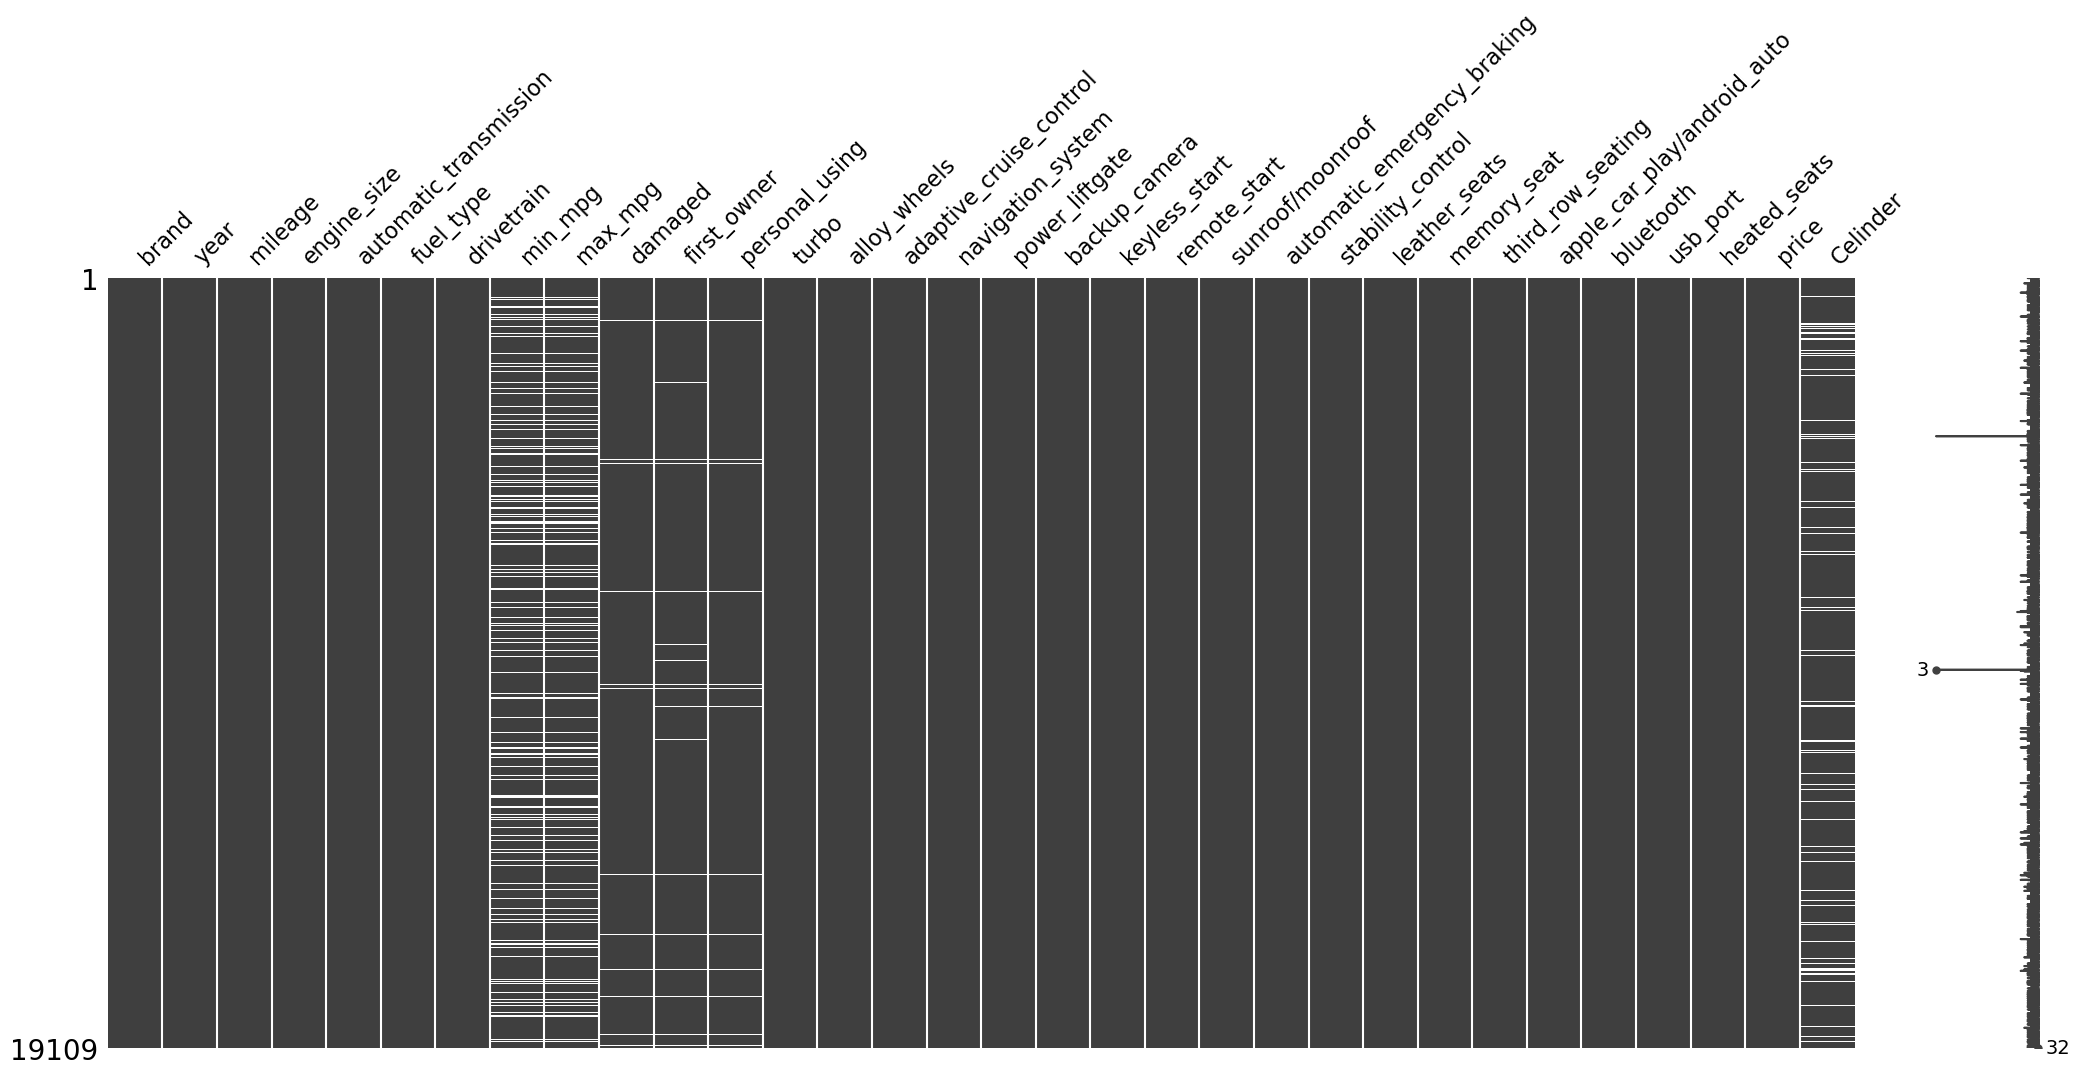

In [19]:
#check nan values
missingno.matrix(df)

In [20]:
# Drop ['min_mpg' , 'max_mpg'] becuse there is many NAN values
#df.drop(['min_mpg' , 'max_mpg'] , axis=1 , inplace=True)

In [20]:
# Drop NAN values from price Col
idx_pri_nan = df[df['price'].isna()].index.to_list()
df.drop(index = idx_pri_nan , axis = 0 , inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19075 entries, 0 to 19108
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   brand                        19075 non-null  object        
 1   year                         19075 non-null  datetime64[ns]
 2   mileage                      19075 non-null  float64       
 3   engine_size                  19075 non-null  object        
 4   automatic_transmission       19075 non-null  float64       
 5   fuel_type                    19075 non-null  object        
 6   drivetrain                   19075 non-null  object        
 7   min_mpg                      16072 non-null  float64       
 8   max_mpg                      16072 non-null  float64       
 9   damaged                      18909 non-null  float64       
 10  first_owner                  18772 non-null  float64       
 11  personal_using               18889 non-nu

____________________________________________________________

# EDA

In [22]:
df.head()

brand       year  mileage engine_size  automatic_transmission  \
0       Mazda 2022-01-01   6580.0       small                     1.0   
1        Alfa 2018-01-01  62717.0       small                     1.0   
2   Chevrolet 2022-01-01  15463.0      medium                     1.0   
3        Land 2022-01-01   1281.0       small                     1.0   
4  Mitsubishi 2021-01-01  36727.0       small                     1.0   

  fuel_type drivetrain  min_mpg  max_mpg  damaged  first_owner  \
0  Gasoline       Four      NaN      NaN      0.0          0.0   
1  Gasoline       Four      NaN      NaN      0.0          0.0   
2  Gasoline       Four      NaN      NaN      0.0          1.0   
3  Gasoline       Four      NaN      NaN      0.0          1.0   
4  Gasoline      Front      NaN      NaN      0.0          1.0   

   personal_using  turbo  alloy_wheels  adaptive_cruise_control  \
0             0.0    1.0           1.0                      0.0   
1             1.0    1.0           0.0                      1.0   
2             1.0    0.0           0.0                      0.0   
3             1.0    1.0           0.0                      1.0   
4             0.0    0.0           1.0                      0.0   

   navigation_system  power_liftgate  backup_camera  keyless_start  \
0                0.0             1.0            1.0            0.0   
1                1.0             1.0            1.0            1.0   
2                0.0             0.0            0.0            0.0   
3                1.0             1.0            1.0            0.0   
4                0.0             0.0            1.0            1.0   

   remote_start  sunroof/moonroof  automatic_emergency_braking  \
0           0.0               1.0                          0.0   
1           1.0               0.0                          0.0   
2           1.0               0.0                          0.0   
3           1.0               1.0                          0.0   
4           0.0               0.0                          0.0   

   stability_control  leather_seats  memory_seat  third_row_seating  \
0                1.0            1.0          0.0                1.0   
1                1.0            0.0          1.0                0.0   
2                0.0            0.0          0.0                0.0   
3                1.0            1.0          1.0                0.0   
4                1.0            0.0          0.0                0.0   

   apple_car_play/android_auto  bluetooth  usb_port  heated_seats     price  \
0                          1.0        0.0       0.0           1.0   36789.0   
1                          1.0        1.0       0.0           0.0   39993.0   
2                          0.0        0.0       0.0           1.0   46986.0   
3                          0.0        0.0       0.0           1.0  141999.0   
4                          1.0        1.0       1.0           1.0   21595.0   

   Celinder  
0       4.0  
1       NaN  
2       8.0  
3       6.0  
4       4.0

In [23]:
px.histogram(data_frame=df , x = 'brand' , title='histogram for brand feature')

In [24]:
px.pie(data_frame=df , names=df['engine_size'].value_counts().index ,values=df['engine_size'].value_counts().values ,
      hole=0.5 , title= 'Pie chart of engine_size ')

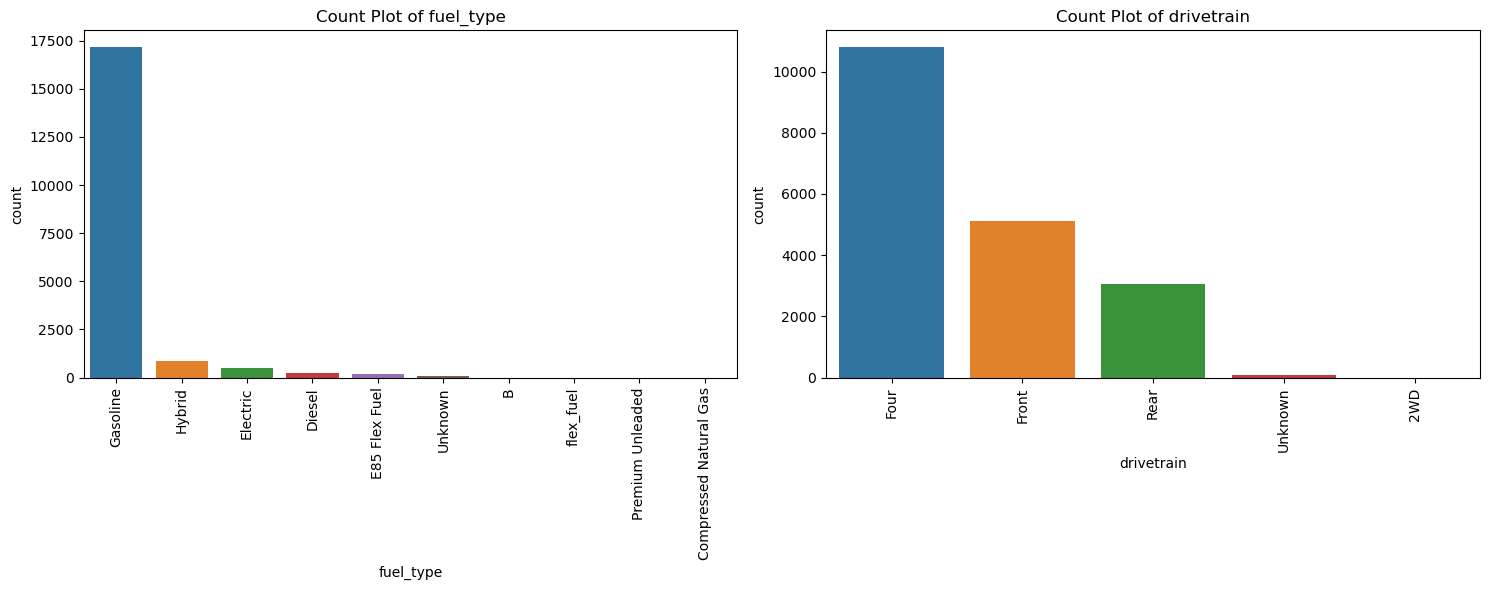

In [25]:
# count plot 
cat_var = ['fuel_type' , 'drivetrain']

fig , axs = plt.subplots(nrows=1 , ncols=2 , figsize = (15 , 6))

for i , var in enumerate(cat_var):
    sns.countplot(data=df , x = var , ax = axs[i] , order= df[var].value_counts().index)
    axs[i].set_xticklabels(axs[i].get_xticklabels() , rotation = 90)
    axs[i].set_title(f"Count Plot of {var}")
    
fig.tight_layout()

plt.show()

In [26]:
# Drob some category from 'fuel_type ' col because is uselss
dro_idx = df[(df['fuel_type'] == 'B' )| (df['fuel_type'] == 'flex_fuel') | (df['fuel_type'] == 'Compressed Natural Gas')].index.to_list()
df.drop(index = dro_idx , axis = 0 , inplace = True)

In [27]:
# Drob some category from 'drivetrain' col because is uselss
idx =  df[df['drivetrain'] == '2WD'].index.to_list()
df.drop(index = idx , axis = 0 , inplace = True)

<AxesSubplot:>

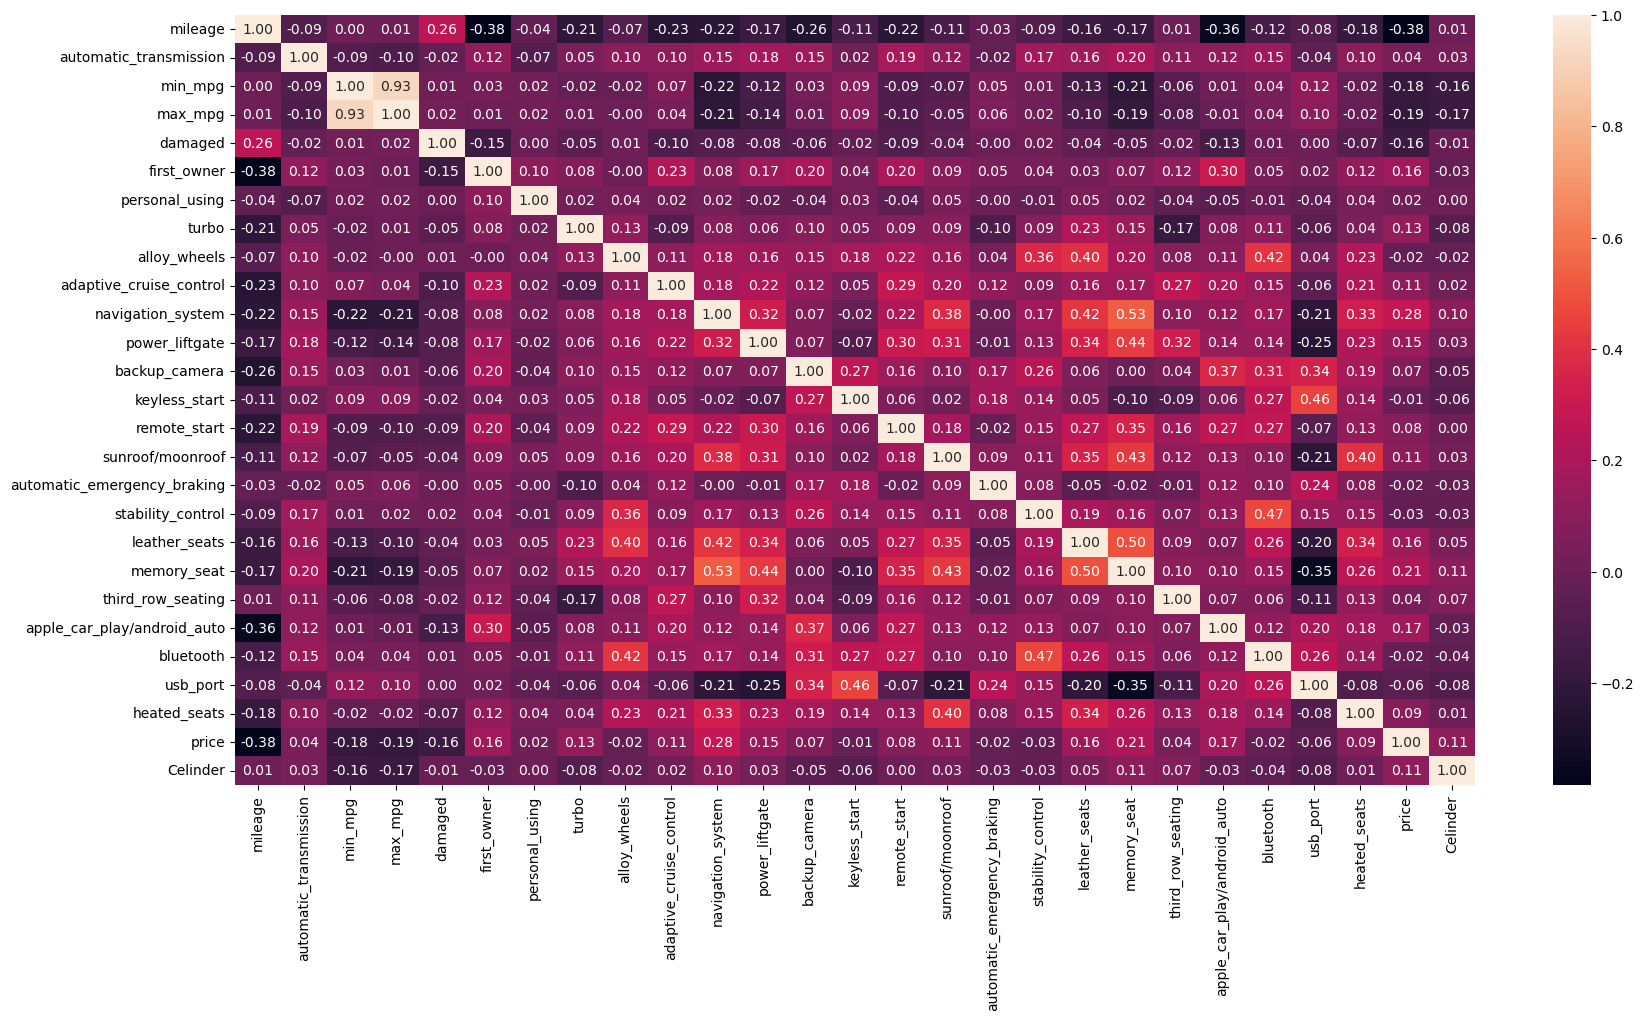

In [28]:
# Correlation Heatmap (print the correlation score each variables)
plt.figure(figsize= (20 , 10))
sns.heatmap(df.corr() , fmt = '.2f' , annot = True)

In [29]:
df.columns

Index(['brand', 'year', 'mileage', 'engine_size', 'automatic_transmission',
       'fuel_type', 'drivetrain', 'min_mpg', 'max_mpg', 'damaged',
       'first_owner', 'personal_using', 'turbo', 'alloy_wheels',
       'adaptive_cruise_control', 'navigation_system', 'power_liftgate',
       'backup_camera', 'keyless_start', 'remote_start', 'sunroof/moonroof',
       'automatic_emergency_braking', 'stability_control', 'leather_seats',
       'memory_seat', 'third_row_seating', 'apple_car_play/android_auto',
       'bluetooth', 'usb_port', 'heated_seats', 'price', 'Celinder'],
      dtype='object')

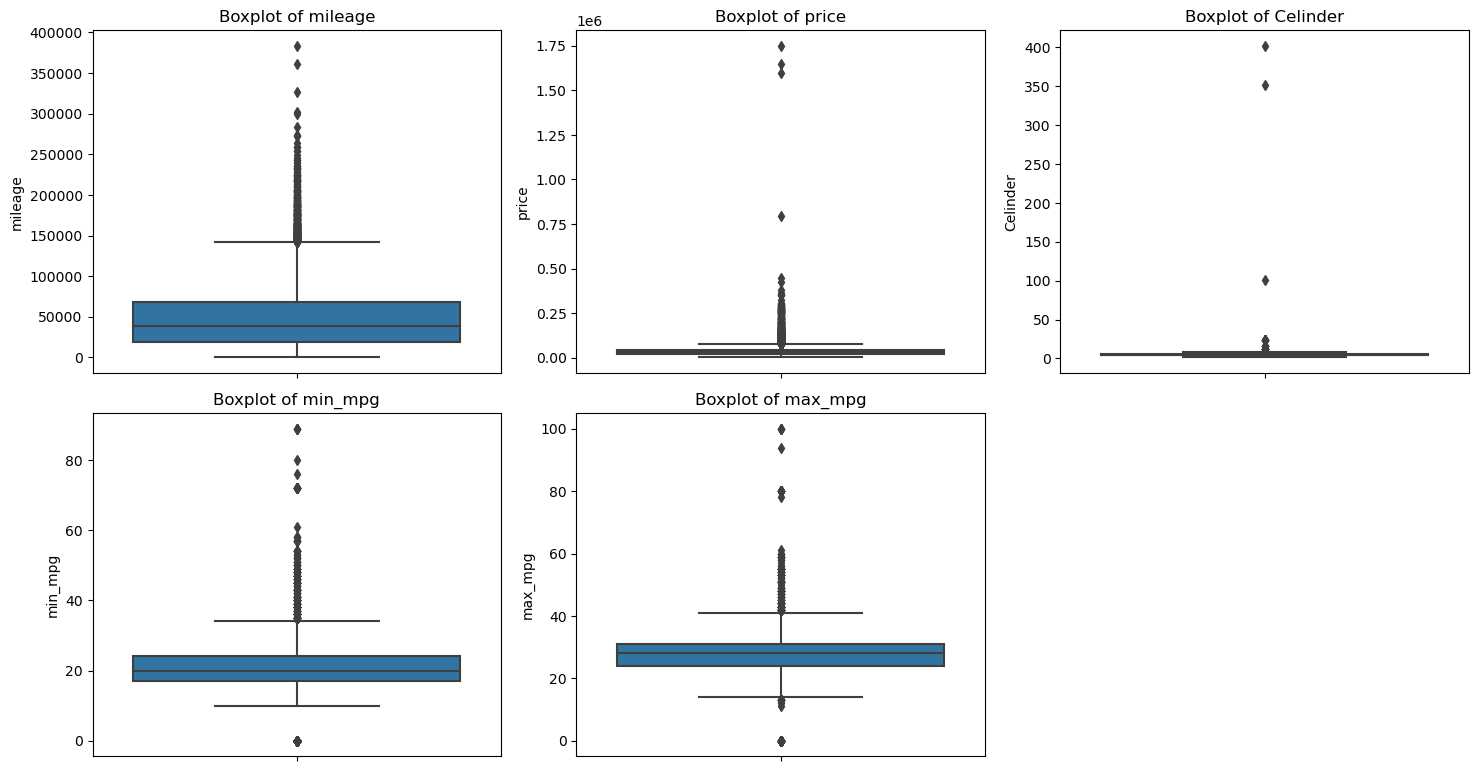

In [30]:
# make Box plot to check Outlier
num_var = ['mileage' , 'price' , 'Celinder' , 'min_mpg' , 'max_mpg']
fig , axs = plt.subplots(nrows= 2 , ncols = 3 , figsize = (15 , 8))
axs = axs.flatten()

for i , var in enumerate(num_var):
    sns.boxplot(data=df , y = var , ax = axs[i])
    
    
    axs[i].set_title(f"Boxplot of {var}")


fig.tight_layout()

fig.delaxes(axs[5])

plt.show()

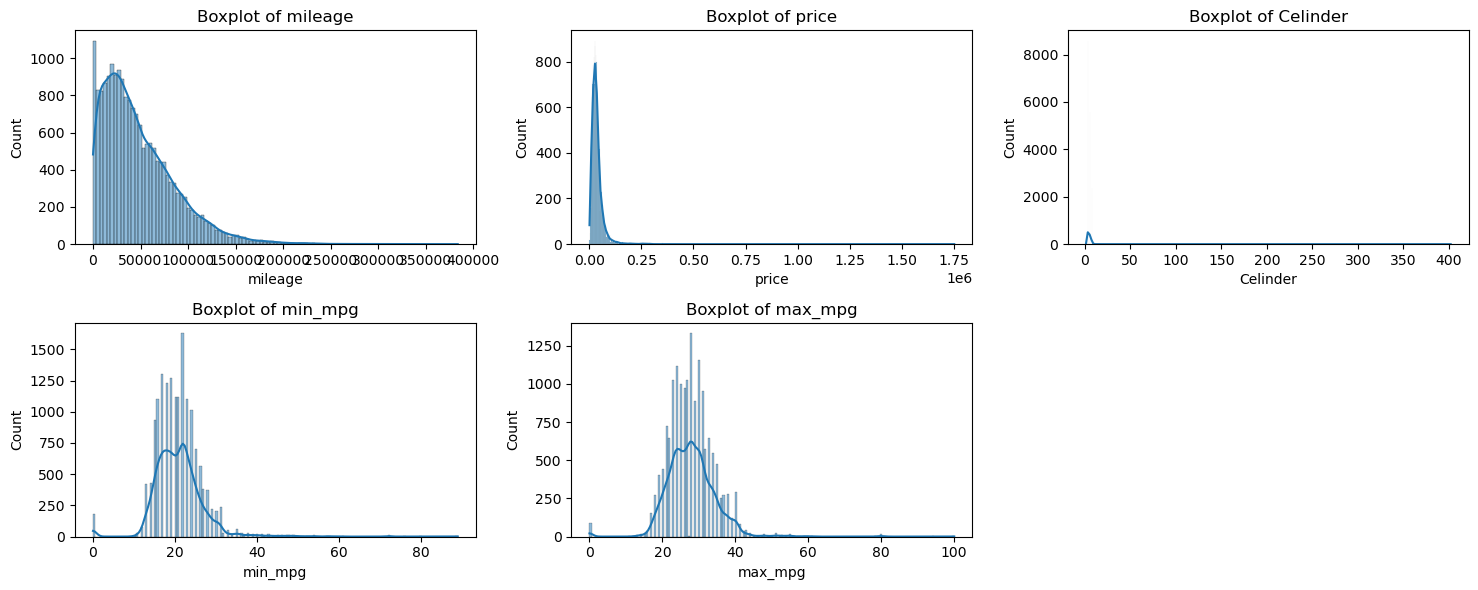

In [31]:
# there is right-skewed on mileage , price and Celinder columns
num_var = ['mileage' , 'price' , 'Celinder' , 'min_mpg' , 'max_mpg']
fig , axs = plt.subplots(nrows= 2 , ncols = 3 , figsize = (15 , 6))
axs = axs.flatten()

for i , var in enumerate(num_var):
    sns.histplot(data=df , x = var , ax = axs[i] , kde = True  )
    
    
    axs[i].set_title(f"Boxplot of {var}")


fig.tight_layout()

fig.delaxes(axs[5])

plt.show()

In [32]:
# handling outliers using threshold for 'min_mpg' col
idx_drop_min_mpg = df[(df['min_mpg'] == 80.0) | (df['min_mpg'] == 89.0)].index.to_list()
df.drop(index = idx_drop_min_mpg , axis = 0 , inplace = True)

In [33]:
# handling outliers using threshold for 'max_mpg' col
idx_drop_max_mpg = df[(df['max_mpg'] == 100.0) | (df['max_mpg'] == 94.0)].index.to_list()
df.drop(index = idx_drop_max_mpg , axis = 0 , inplace = True)

In [34]:
# handling outliers using threshold for Celinder col
idx_Celi_dro =  df[df['Celinder'] > 16].index.to_list()
df.drop(index = idx_Celi_dro , axis = 0 , inplace = True)

In [35]:
# handling outliers using threshold for mileage col
idx_Mil_dro = df[df['mileage'] > 200000].index.to_list()
df.drop(index = idx_Mil_dro , axis = 0 , inplace = True)

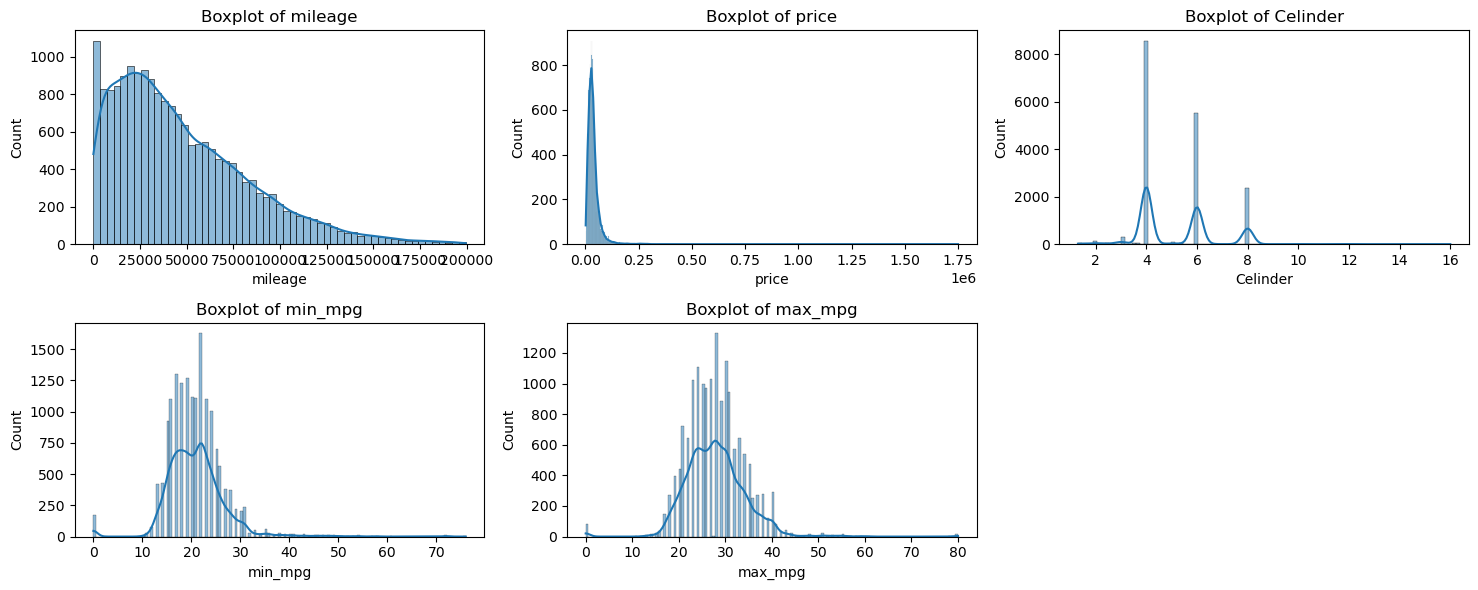

In [36]:
num_var = ['mileage' , 'price' , 'Celinder' , 'min_mpg' , 'max_mpg']
fig , axs = plt.subplots(nrows= 2 , ncols = 3 , figsize = (15 , 6))
axs = axs.flatten()

for i , var in enumerate(num_var):
    sns.histplot(data=df , x = var , ax = axs[i] , kde = True  )
    
    
    axs[i].set_title(f"Boxplot of {var}")


fig.tight_layout()

fig.delaxes(axs[5])

plt.show()

In [37]:
# get columns if nunique == 2
Bin = []
for i in df.columns :
    if df[i].nunique() == 2 :
        Bin.append(i)
print(Bin)

['automatic_transmission', 'damaged', 'first_owner', 'personal_using', 'turbo', 'alloy_wheels', 'adaptive_cruise_control', 'navigation_system', 'power_liftgate', 'backup_camera', 'keyless_start', 'remote_start', 'sunroof/moonroof', 'automatic_emergency_braking', 'stability_control', 'leather_seats', 'memory_seat', 'third_row_seating', 'apple_car_play/android_auto', 'bluetooth', 'usb_port', 'heated_seats']


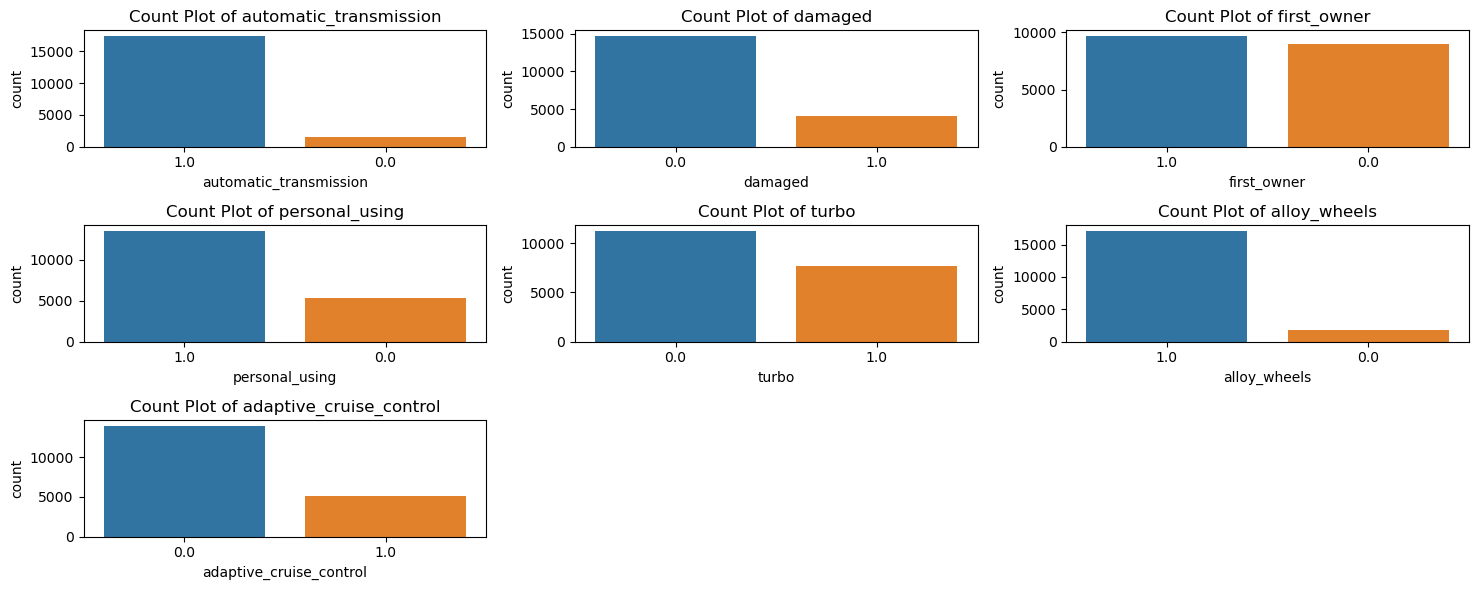

In [38]:
num_var = ['automatic_transmission', 'damaged', 'first_owner', 'personal_using', 
           'turbo', 'alloy_wheels', 'adaptive_cruise_control']

fig , axs = plt.subplots(nrows=3 , ncols=3 , figsize = (15 , 6))
axs = axs.flatten()
for i , var in enumerate(num_var):
    sns.countplot(data=df , x = var , ax = axs[i] , order= df[var].value_counts().index)
    axs[i].set_xticklabels(axs[i].get_xticklabels())
    axs[i].set_title(f"Count Plot of {var}")
    
fig.tight_layout()

fig.delaxes(axs[7])

fig.delaxes(axs[8])





plt.show()

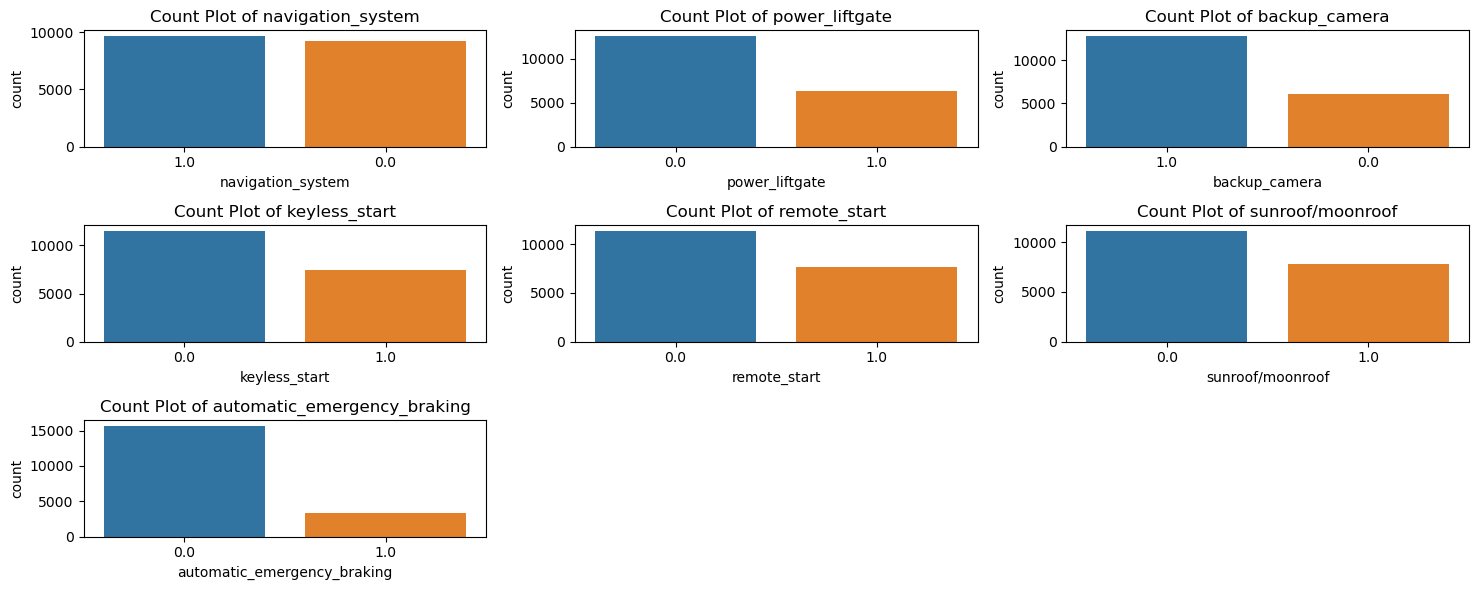

In [39]:
num_var_2 = ['navigation_system', 'power_liftgate', 'backup_camera', 'keyless_start', 'remote_start',
             'sunroof/moonroof', 'automatic_emergency_braking']
fig , axs = plt.subplots(nrows=3 , ncols=3 , figsize = (15 , 6))
axs = axs.flatten()
for i , var in enumerate(num_var_2):
    sns.countplot(data=df , x = var , ax = axs[i] , order= df[var].value_counts().index)
    axs[i].set_xticklabels(axs[i].get_xticklabels() )
    axs[i].set_title(f"Count Plot of {var}")
    
fig.tight_layout()

fig.delaxes(axs[7])

fig.delaxes(axs[8])





plt.show()

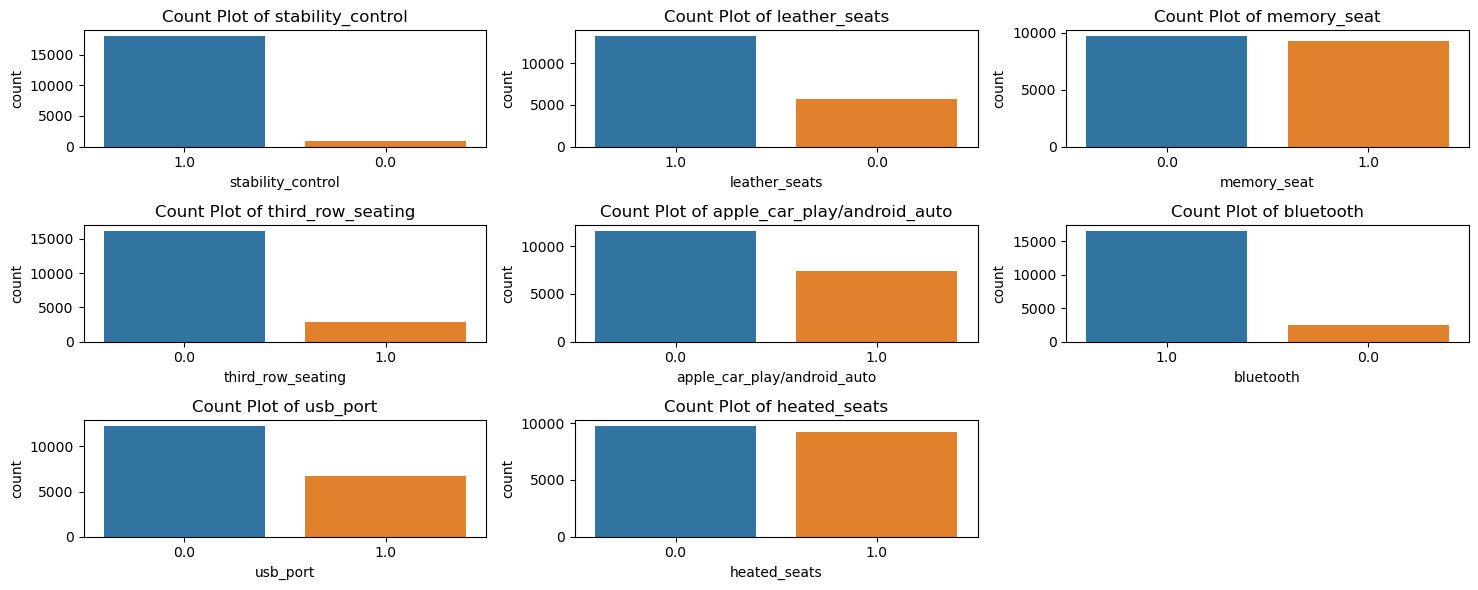

In [40]:
num_var_3 = ['stability_control', 'leather_seats', 'memory_seat', 'third_row_seating',
             'apple_car_play/android_auto', 'bluetooth', 'usb_port', 'heated_seats']
fig , axs = plt.subplots(nrows=3 , ncols=3 , figsize = (15 , 6))
axs = axs.flatten()
for i , var in enumerate(num_var_3):
    sns.countplot(data=df , x = var , ax = axs[i] , order= df[var].value_counts().index)
    axs[i].set_xticklabels(axs[i].get_xticklabels())
    axs[i].set_title(f"Count Plot of {var}")
    
fig.tight_layout()

fig.delaxes(axs[8])







plt.show()

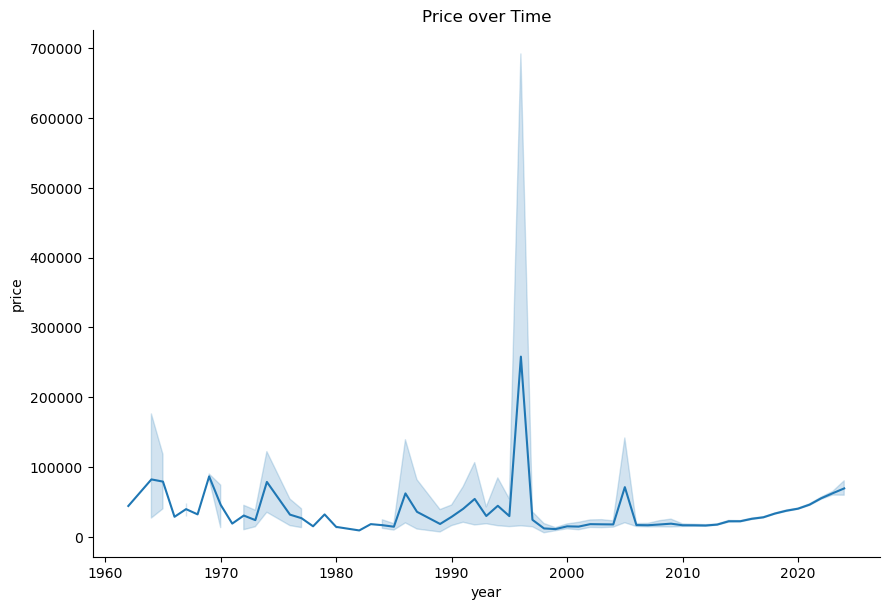

In [41]:
# the highest years in prices between 1990 to 2000  
plot = sns.relplot(data=df, x='year', y='price', kind='line', height=6, aspect=1.5)
plot.ax.set_title('Price over Time')
plt.show()


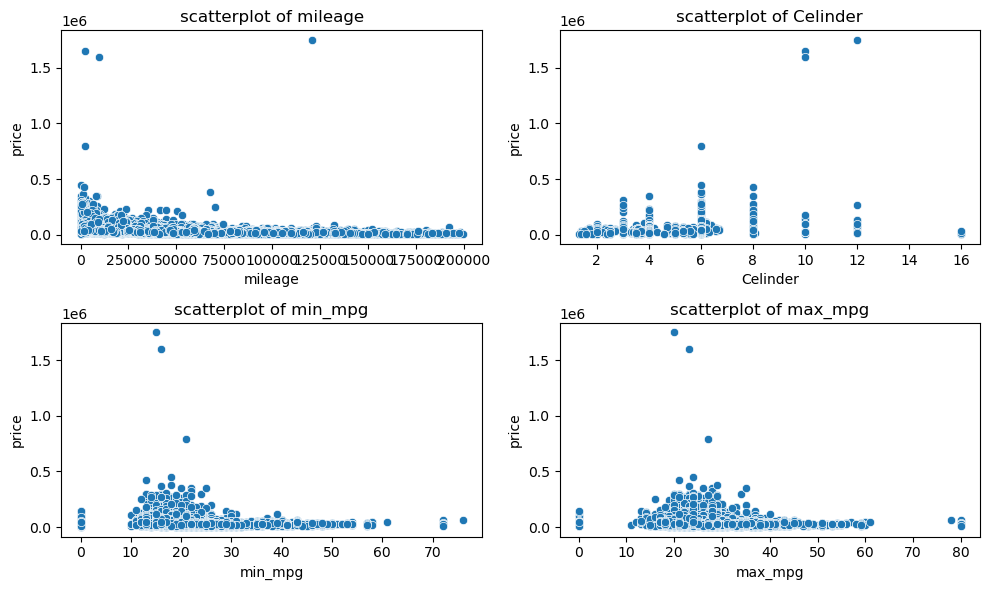

In [42]:
num_var = ['mileage' , 'Celinder' , 'min_mpg' , 'max_mpg' ]
fig , axs = plt.subplots(nrows= 2 , ncols = 2 , figsize = (10 , 6))
axs = axs.flatten()

for i , var in enumerate(num_var):
    sns.scatterplot(data=df , x = var ,y = 'price' ,  ax = axs[i])
    
    
    axs[i].set_title(f"scatterplot of {var}")


fig.tight_layout()



plt.show()

_______________________________________________________________________________

#### Split data to trian & Test

In [43]:
# ['brand' , 'year'] in my point of view it is useless
df.drop( columns = ['brand' , 'year'] , axis = 1 , inplace = True)

In [44]:
# Split to features and target 
X = df.drop(columns = 'price' , axis = 1)
y = df['price']

In [58]:
# Split to train and test 
X_train , X_test , y_train , y_test =  train_test_split(X , y , test_size = 0.2 , shuffle = True , random_state = 45 )

print('X_train.shap ' , X_train.shape)
print('X_train.shap ' , y_train.shape)
print('X_train.shap ' , X_test.shape)
print('X_train.shap ' , y_test.shape)

X_train.shap  (15186, 29)
X_train.shap  (15186,)
X_train.shap  (3797, 29)
X_train.shap  (3797,)


In [59]:
X_train.head()

mileage engine_size  automatic_transmission fuel_type drivetrain  \
3792   33903.0       small                     1.0  Gasoline       Four   
1051   36574.0       small                     0.0  Gasoline      Front   
3833    2826.0       small                     1.0  Gasoline       Four   
3206    1899.0       small                     1.0  Gasoline      Front   
11640   2966.0       small                     1.0  Gasoline       Four   

       min_mpg  max_mpg  damaged  first_owner  personal_using  turbo  \
3792      19.0     29.0      0.0          1.0             1.0    0.0   
1051      22.0     28.0      0.0          0.0             1.0    1.0   
3833      23.0     29.0      0.0          0.0             0.0    0.0   
3206      23.0     30.0      0.0          1.0             1.0    1.0   
11640     33.0     41.0      0.0          1.0             1.0    0.0   

       alloy_wheels  adaptive_cruise_control  navigation_system  \
3792            1.0                      0.0                1.0   
1051            1.0                      0.0                1.0   
3833            1.0                      0.0                0.0   
3206            1.0                      1.0                0.0   
11640           1.0                      1.0                1.0   

       power_liftgate  backup_camera  keyless_start  remote_start  \
3792              0.0            1.0            0.0           0.0   
1051              0.0            1.0            1.0           1.0   
3833              0.0            1.0            1.0           0.0   
3206              0.0            1.0            1.0           0.0   
11640             0.0            1.0            1.0           1.0   

       sunroof/moonroof  automatic_emergency_braking  stability_control  \
3792                1.0                          0.0                1.0   
1051                0.0                          0.0                1.0   
3833                0.0                          0.0                1.0   
3206                0.0                          1.0                1.0   
11640               1.0                          1.0                1.0   

       leather_seats  memory_seat  third_row_seating  \
3792             1.0          1.0                0.0   
1051             1.0          0.0                0.0   
3833             1.0          0.0                0.0   
3206             0.0          0.0                0.0   
11640            1.0          0.0                0.0   

       apple_car_play/android_auto  bluetooth  usb_port  heated_seats  \
3792                           0.0        1.0       0.0           1.0   
1051                           1.0        1.0       1.0           0.0   
3833                           1.0        1.0       1.0           1.0   
3206                           0.0        1.0       0.0           1.0   
11640                          1.0        1.0       1.0           1.0   

       Celinder  
3792        6.0  
1051        4.0  
3833        4.0  
3206        4.0  
11640       2.5

In [60]:
numerical = ['mileage', 'min_mpg', 'max_mpg', 'Celinder']

In [62]:
cat_ord = ['engine_size' , 'drivetrain']
cat_one = ['fuel_type']

In [ ]:
ready_col = list(set(X_train.columns.to_list()) - set(numerical) - set(cat_ord) - set(cat_one))
#['automatic_transmission', 'damaged', 'first_owner', 'personal_using', 'turbo',
             #'alloy_wheels', 'adaptive_cruise_control', 'navigation_system', 'power_liftgate', 'backup_camera', 'keyless_start',
             #'remote_start', 'sunroof/moonroof', 'automatic_emergency_braking', 
             #'stability_control', 'leather_seats', 'memory_seat', 'third_row_seating', 'apple_car_play/android_auto', 
             #'bluetooth', 'usb_port', 'heated_seats']

#list(set(X_train.columns.to_list()) - set(numerical) - set(cat_ord) - set(cat_one))

In [63]:
## My Pipline

#Numerical --> Impute median , RobustScaler
num_pip = Pipeline(steps=[
                        ('Selector' , DataFrameSelector(numerical)),
                        ('imputer' , SimpleImputer(strategy='median')),
                        ('Robust' , RobustScaler())
])


# Ready_col -- > Impute most_frequent

ready_Pip = Pipeline(steps=[
                        ('Selector' , DataFrameSelector(ready_col)),
                        ('imputer' , SimpleImputer(strategy='most_frequent'))
                        
])




# Category ordinal -- > Impute most_frequent , incodeing 

cat_ord_pipline = Pipeline(steps=[
                        ('Selector' , DataFrameSelector(cat_ord)),
                        ('imputer' , SimpleImputer(strategy='most_frequent')),
                        ('incodeing' , OrdinalEncoder())
])


# Category onehot --> Impute Mode , incoding 

cat_onehot_pipline = Pipeline(steps=[
                        ('Selector' , DataFrameSelector(cat_one)),
                       ('imputer' , SimpleImputer(strategy='most_frequent')),
                       ('incodeing' , OneHotEncoder(drop = 'first') )
])  

all_pipline = FeatureUnion(transformer_list= [
                        ('Numerical' ,num_pip ),
                        ('ready_Pip' , ready_Pip),
                        ('cat_ord_pipline' , cat_ord_pipline ),
                        ('cat_onehot_pipline' , cat_onehot_pipline)
])

X_train_final = all_pipline.fit_transform(X_train)
X_test_final = all_pipline.transform(X_test)

C:\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [64]:
X_train_final.shape , X_test_final.shape

((15186, 34), (3797, 34))

___________________________________________________________

## Building Models

### Linear Regression 

In [65]:
# linear regression
linear_model = LinearRegression()
linear_model.fit(X_train_final,y_train)

# predict 
y_pred_linear_train =  linear_model.predict(X_train_final)
y_pred_linear_test =  linear_model.predict(X_test_final)

#Evaluate
score_linear_train = r2_score(y_train , y_pred_linear_train)
score_linear_test = r2_score(y_test , y_pred_linear_test)

print(f'this R2_score of score_linear_train {score_linear_train * 100 : .3f}')
print(f'this R2_score of score_linear_test {score_linear_test * 100 : .3f}')


this R2_score of score_linear_train  27.517
this R2_score of score_linear_test  44.806


___________________________________________________________________

## SGDRegressor

In [66]:
### SGDRegressor

sgd_reg = SGDRegressor(penalty = 'l2' ,learning_rate='constant' , eta0 = 0.00001 , alpha = 0.0001 ,
                       max_iter= 2500)
sgd_reg.fit(X_train_final , y_train)

# predict 
y_pred_sgd_train =  sgd_reg.predict(X_train_final)
y_pred_sgd_test =  sgd_reg.predict(X_test_final)

#Evaluate
score_sgd_train = r2_score(y_train , y_pred_sgd_train)
score_sgd_test = r2_score(y_test , y_pred_sgd_test)

print(f'this R2_score of score_SGDRegressor_train {score_sgd_train * 100 : .3f}')
print(f'this R2_score of score_SGDRegressor_test {score_sgd_test * 100 : .3f}')


this R2_score of score_SGDRegressor_train  24.964
this R2_score of score_SGDRegressor_test  42.945


__________________________________________________________________________

## Ridge

In [67]:
## Ridge
ridge_reg = Ridge()
ridge_reg.fit(X_train_final , y_train)

# predict 
y_pred_ridge_train =  ridge_reg.predict(X_train_final)
y_pred_ridge_test =  ridge_reg.predict(X_test_final)

#Evaluate
score_ridge_train = r2_score(y_train , y_pred_ridge_train)
score_ridge_test = r2_score(y_test , y_pred_ridge_test)

print(f'this R2_score of score_Ridge_train {score_ridge_train * 100 : .3f}')
print(f'this R2_score of score_Ridge_test {score_ridge_test * 100 : .3f}')


this R2_score of score_Ridge_train  27.513
this R2_score of score_Ridge_test  44.845


__________________________________________________________

## KNN

In [68]:
# KNN
KNN_reg = KNeighborsRegressor(n_neighbors = 5 , p = 2 , metric = 'minkowski')
KNN_reg.fit(X_train_final , y_train)

# predict 
y_pred_KNN_train =  KNN_reg.predict(X_train_final)
y_pred_KNN_test =  KNN_reg.predict(X_test_final)

#Evaluate
score_KNN_train = r2_score(y_train , y_pred_KNN_train)
score_KNN_test = r2_score(y_test , y_pred_KNN_test)

print(f'this R2_score of score_KNN_train {score_KNN_train * 100 : .3f}')
print(f'this R2_score of score_KNN_test {score_KNN_test * 100 : .3f}')


this R2_score of score_KNN_train  67.100
this R2_score of score_KNN_test  69.813


____________________________________________________________

## DecisionTree

In [69]:
dtree = DecisionTreeRegressor(max_depth = 10 , random_state = 45 )
dtree.fit(X_train_final , y_train)

# predict 
y_pred_dtree_train =  dtree.predict(X_train_final)
y_pred_dtree_test =  dtree.predict(X_test_final)

#Evaluate
score_dtree_train = r2_score(y_train , y_pred_dtree_train)
score_dtree_test = r2_score(y_test , y_pred_dtree_test)

print(f'this R2_score of score_dtree_train {score_dtree_train * 100 : .3f}')
print(f'this R2_score of score_dtree_test {score_dtree_test * 100 : .3f}')


this R2_score of score_dtree_train  91.606
this R2_score of score_dtree_test  53.032


______________________________________________________________________

## RandomForest

In [73]:
RF_reg =  RandomForestRegressor(n_estimators = 120 , max_depth = 15 ,
                                max_samples = 0.8 , random_state = 45 ,)
RF_reg.fit(X_train_final , y_train)

# predict 
y_pred_RF_train =  RF_reg.predict(X_train_final)
y_pred_RF_test =  RF_reg.predict(X_test_final)

#Evaluate
score_RF_train = r2_score(y_train , y_pred_RF_train)
score_RF_test = r2_score(y_test , y_pred_RF_test)

print(f'this R2_score of score_RF_train {score_RF_train  :.3f}')
print(f'this R2_score of score_RF_test {score_RF_test  :.3f}')


this R2_score of score_RF_train 0.901
this R2_score of score_RF_test 0.704


_____________________________________________

## XGBRegressor

In [74]:
xgb_reg =  XGBRegressor(objective = 'reg:squarederror' , learning_rate = 0.1 , 
            colsample_bytree = 0.8 , subsample = 0.8 , max_depth = 5 , n_estimators = 150)

xgb_reg.fit(X_train_final , y_train)

# predict 
y_pred_xgb_train =  xgb_reg.predict(X_train_final)
y_pred_xgb_test =  xgb_reg.predict(X_test_final)

#Evaluate
score_xgb_train = r2_score(y_train , y_pred_xgb_train)
score_xgb_test = r2_score(y_test , y_pred_xgb_test)

print(f'this R2_score of score_xgb_train {score_xgb_train  :.3f}')
print(f'this R2_score of score_xgb_test {score_xgb_test  :.3f}')


this R2_score of score_xgb_train 0.893
this R2_score of score_xgb_test 0.728


__________________________________________________________________

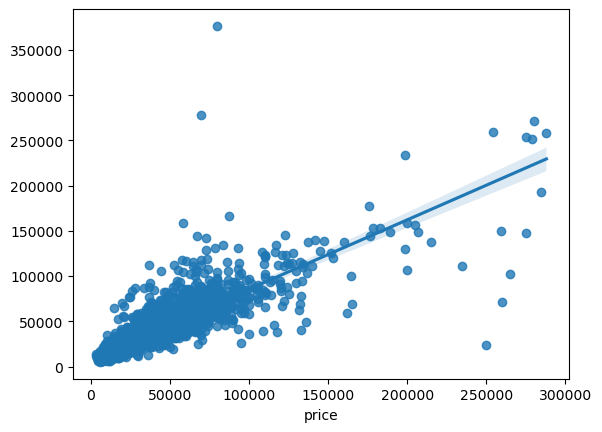

In [77]:
sns.regplot(x=y_test, y=y_pred_RF_test)
plt.show()

In [79]:
sns.regplot(x = y_test , y = y_pred_xgb_test)
plt.show()